### Part A

In [ ]:
# HERE YOU WILL WRITE CODE TO TEST A NUMBER OF PREDICTORS
# AND FINALLY CHOOSE AND TRAIN THE PREDICTOR THAT YOU WILL BE USING FOR PART B

# 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn import ensemble
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn import metrics

## 2. Importing the data

In [2]:
dataset = pd.read_csv('CE802_P3_Data.csv')
dataset.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F28,F29,F30,F31,F32,F33,F34,F35,F36,Target
0,854.04,-15267.84,193.04,12132.20,464.22,-19.81,920.42,11.84,-38.02,8.35,...,-100.43,10497.32,8,-46.22,91.89,-41.70,-849.78,-5.12,4261.68,609.09
1,1748.76,-4299.45,439.72,18046.14,540.36,-8.55,1913.78,11.28,122.02,-8.83,...,-97.41,16792.88,4,51.24,-450.34,-75.30,-1801.59,-0.16,2737.58,232.66
2,834.44,-18927.93,-85.86,18533.56,611.34,-15.88,1956.90,10.00,-24.26,-54.33,...,-135.59,-5647.94,6,40.93,-471.02,-55.50,-2529.75,8.50,3696.64,480.01
3,1429.36,3653.73,-59.69,31314.52,408.45,-9.67,1628.18,11.59,90.88,-38.87,...,-85.77,6869.46,2,-9.19,-290.45,-67.86,-2915.34,9.76,2919.54,1685.20
4,188.80,-3932.07,128.70,22837.34,530.22,-14.93,1218.16,9.55,-93.78,-61.95,...,-75.76,16974.08,2,100.86,-850.10,-64.95,-2154.12,13.42,2693.48,617.96


## 3. Data Analysis

In [3]:
# it helps to get the information about the dataframe
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 37 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      1500 non-null   float64
 1   F2      1500 non-null   float64
 2   F3      1500 non-null   float64
 3   F4      1500 non-null   float64
 4   F5      1500 non-null   float64
 5   F6      1500 non-null   float64
 6   F7      1500 non-null   float64
 7   F8      1500 non-null   float64
 8   F9      1500 non-null   float64
 9   F10     1500 non-null   float64
 10  F11     1500 non-null   int64  
 11  F12     1500 non-null   float64
 12  F13     1500 non-null   float64
 13  F14     1500 non-null   float64
 14  F15     1500 non-null   float64
 15  F16     1500 non-null   float64
 16  F17     1500 non-null   float64
 17  F18     1500 non-null   float64
 18  F19     1500 non-null   float64
 19  F20     1500 non-null   object 
 20  F21     1500 non-null   float64
 21  F22     1500 non-null   float64
 22  

In [4]:
# To check the unique value of the column 
dataset['F20'].unique()

array(['Low', 'Very low', 'High', 'Very high', 'Medium'], dtype=object)

In [5]:
# To check the unique value of the column
dataset['F27'].unique()

array(['Rest', 'USA', 'Europe', 'UK'], dtype=object)

In [6]:
# converting categorical variable into numerical 
columns = {"F20": {"Very low":0, "Low":1, "Medium":2, "High":3, "Very high":4}}
dataset.replace(columns, inplace=True)

In [7]:
# converting categorical variable into numerical using get_dummies
dataset = pd.get_dummies(dataset, columns= ['F27'], drop_first=True)

In [8]:
dataset.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F31,F32,F33,F34,F35,F36,Target,F27_Rest,F27_UK,F27_USA
0,854.04,-15267.84,193.04,12132.20,464.22,-19.81,920.42,11.84,-38.02,8.35,...,-46.22,91.89,-41.70,-849.78,-5.12,4261.68,609.09,1,0,0
1,1748.76,-4299.45,439.72,18046.14,540.36,-8.55,1913.78,11.28,122.02,-8.83,...,51.24,-450.34,-75.30,-1801.59,-0.16,2737.58,232.66,0,0,1
2,834.44,-18927.93,-85.86,18533.56,611.34,-15.88,1956.90,10.00,-24.26,-54.33,...,40.93,-471.02,-55.50,-2529.75,8.50,3696.64,480.01,1,0,0
3,1429.36,3653.73,-59.69,31314.52,408.45,-9.67,1628.18,11.59,90.88,-38.87,...,-9.19,-290.45,-67.86,-2915.34,9.76,2919.54,1685.20,0,0,1
4,188.80,-3932.07,128.70,22837.34,530.22,-14.93,1218.16,9.55,-93.78,-61.95,...,100.86,-850.10,-64.95,-2154.12,13.42,2693.48,617.96,1,0,0


In [9]:
X = dataset.drop(columns=['Target'])
y = dataset['Target']

## 4. Feature scaling

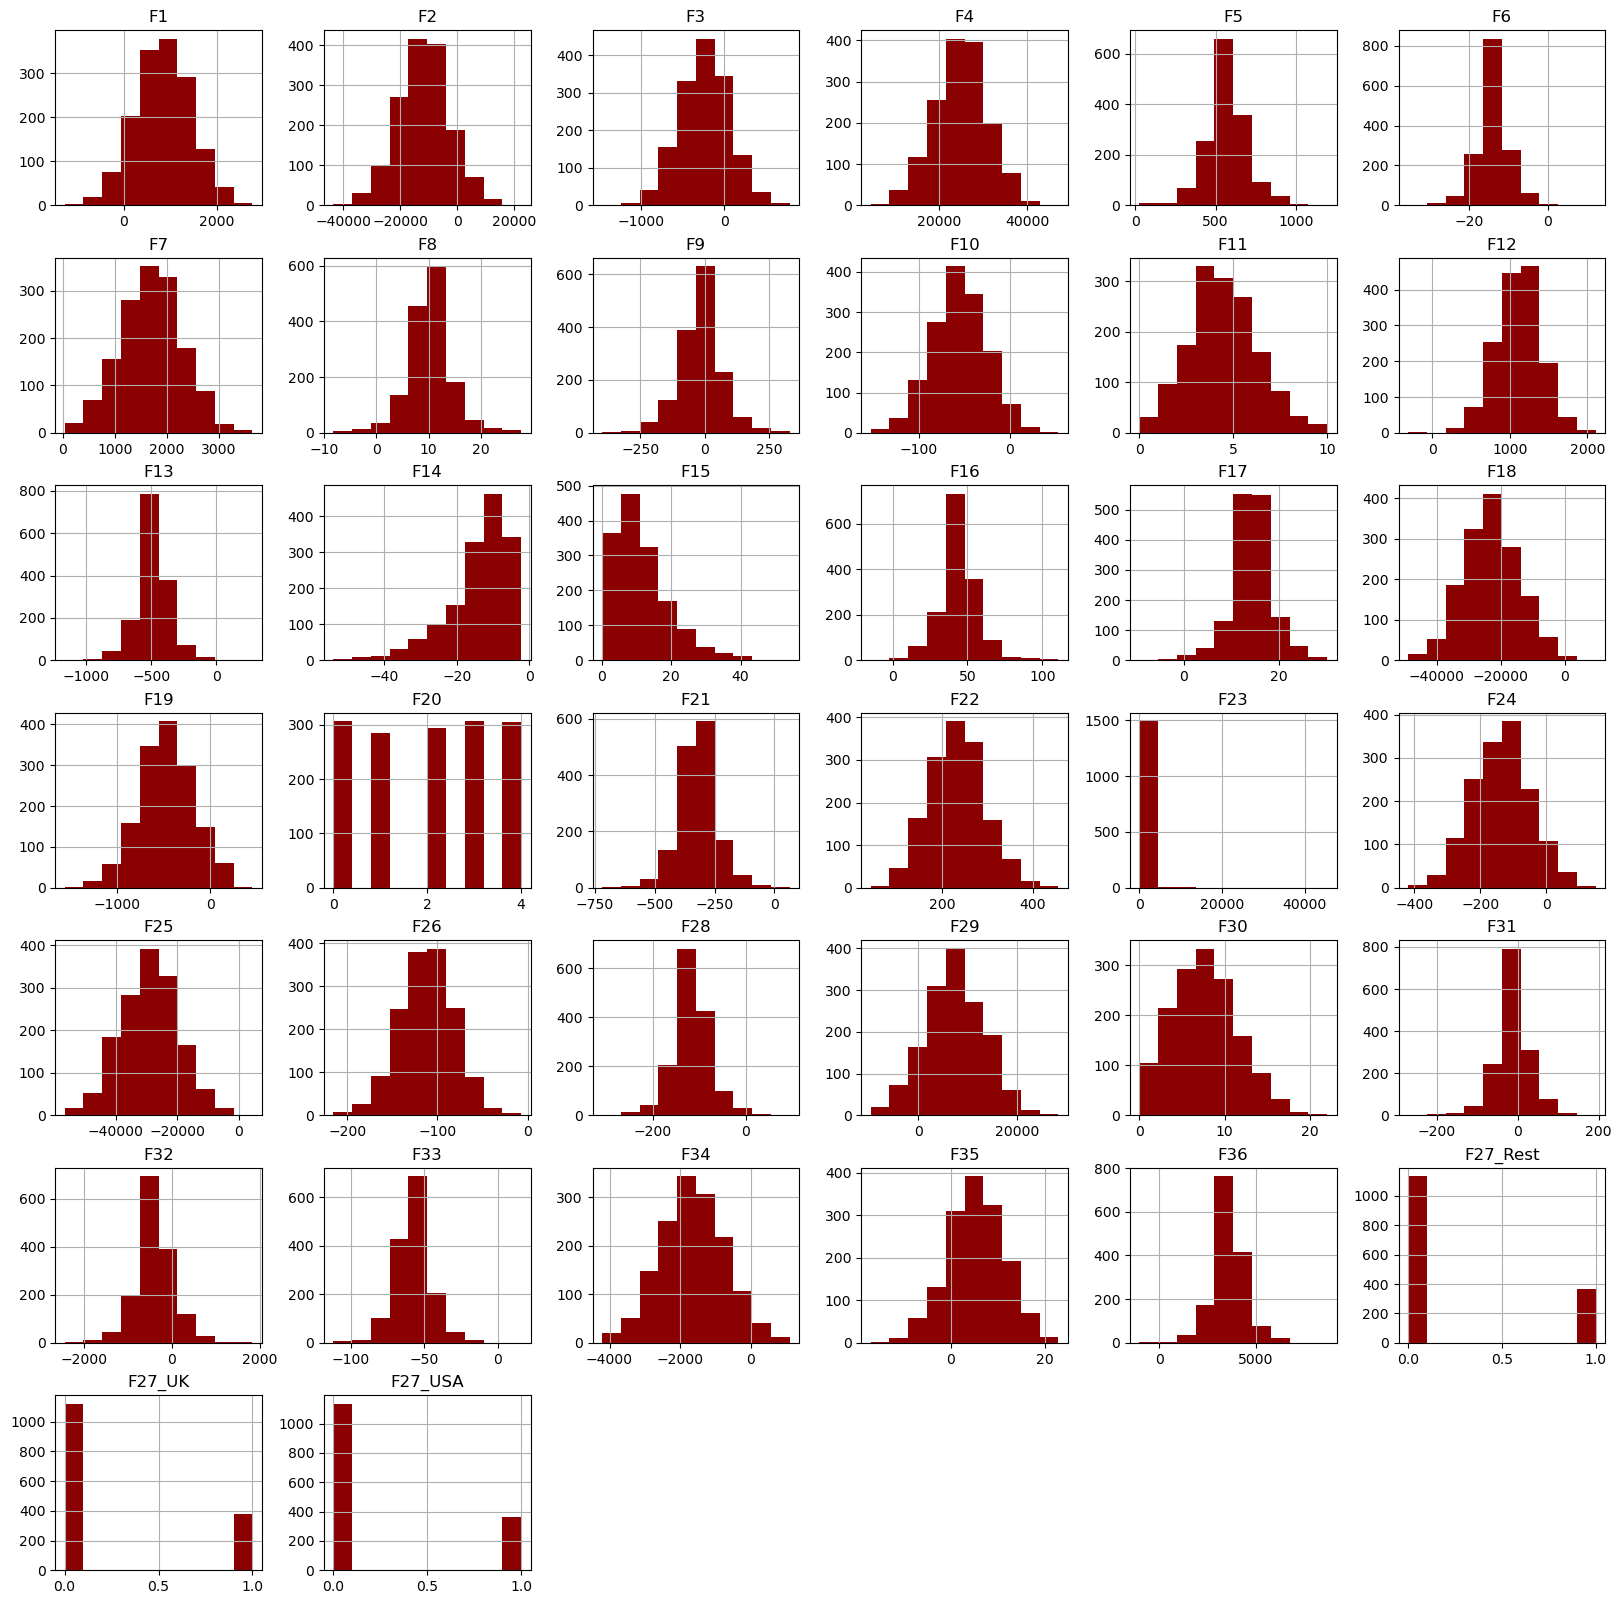

In [10]:
# To see the distribution of data set
X.hist(figsize=(20,20), color='Darkred');

In [11]:
# Split, train & test data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [12]:
np.random.seed(0)

In [13]:
#log transform
X_train['F15'] = np.log1p(X_train['F15'])
X_test['F15'] = np.log1p(X_test['F15'])

<AxesSubplot:>

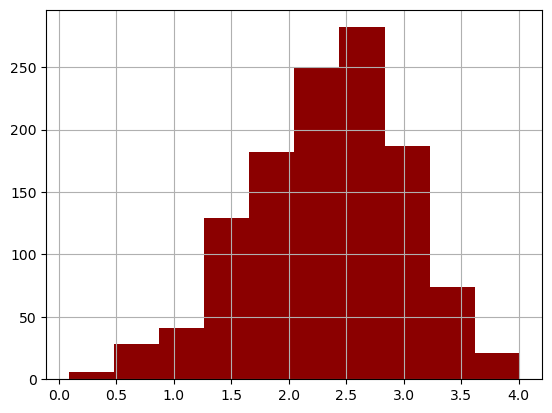

In [14]:
X_train['F15'].hist(color='Darkred')

<AxesSubplot:>

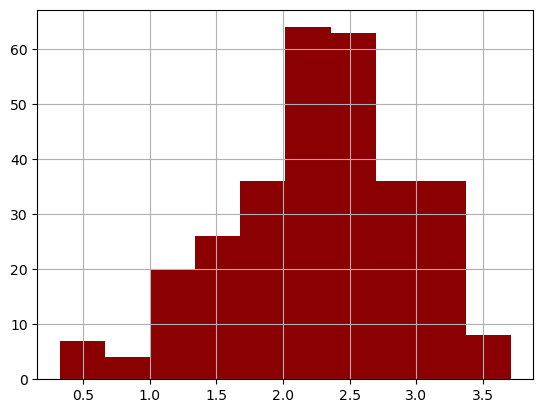

In [15]:
X_test['F15'].hist(color='Darkred')

In [16]:
#square transform 
X_train['F14'] = np.square(X_train['F14'])
X_test['F14'] = np.square(X_test['F14'])

<AxesSubplot:>

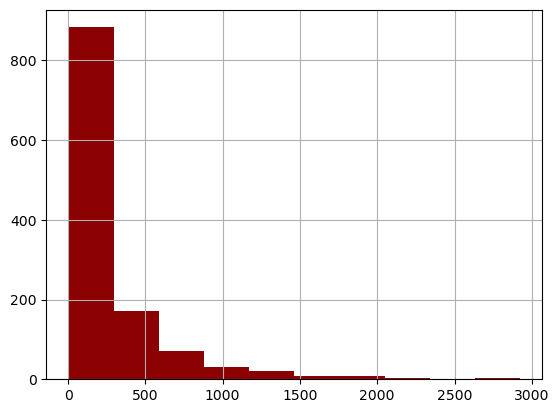

In [17]:
X_train['F14'].hist(color='Darkred')

<AxesSubplot:>

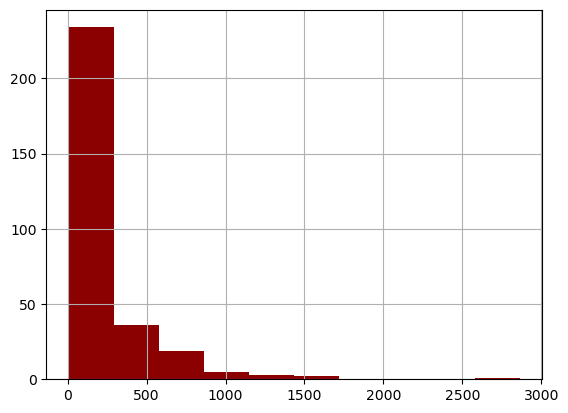

In [18]:
X_test['F14'].hist(color='Darkred')

## 5. Different Models

In [19]:
model_score = [
   
    LinearRegression(),
    RandomForestRegressor(),
    GradientBoostingRegressor()
]
MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)


row_index = 0
for alg in model_score:
    predicted = alg.fit(X_train, y_train)
    train_pred = predicted.predict(X_train)
    test_pred = predicted.predict(X_test)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Train MSE'] = metrics.mean_squared_error(y_train,train_pred)
    MLA_compare.loc[row_index, 'MLA Test MSE'] = metrics.mean_squared_error(y_test, test_pred)
    MLA_compare.loc[row_index, 'MLA MAE'] = metrics.mean_absolute_error(y_test, test_pred)
    MLA_compare.loc[row_index, 'MLA RMSE'] = np.sqrt(metrics.mean_squared_error(y_test, test_pred))                                                                       
    MLA_compare.loc[row_index, 'MLA R2Square'] = metrics.r2_score(y_test, test_pred)
    row_index = row_index+1
    
MLA_compare.sort_values(by = ['MLA R2Square'], ascending = False, inplace = True)    
MLA_compare.reset_index(inplace=True,drop='index')
MLA_compare

,MLA Name,MLA Train MSE,MLA Test MSE,MLA MAE,MLA RMSE,MLA R2Square
0,GradientBoostingRegressor,94007.825720,251686.756992,387.471118,501.683921,0.844557
1,RandomForestRegressor,65303.320078,454376.128423,517.987261,674.074275,0.719375
2,LinearRegression,467704.718912,547082.220055,601.884745,739.650066,0.662119


## 6. Hyperparameter Tunning

In [20]:
GBR = ensemble.GradientBoostingRegressor()

parameters = {
    "n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]
}

grid=RandomizedSearchCV(GBR, param_distributions = parameters, cv=10,  n_jobs=-1)

grid.fit(X_train, y_train)

C:\Users\Akshitta Sarin\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:978: RuntimeWarning: overflow encountered in square
  (array - array_means[:, np.newaxis]) ** 2, axis=1, weights=weights


RandomizedSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 1, 10,
                                                          100],
                                        'max_depth': [1, 3, 5, 7, 9],
                                        'n_estimators': [5, 50, 250, 500]})

In [21]:
grid.best_estimator_

GradientBoostingRegressor(max_depth=7, n_estimators=250)

In [22]:
GBR1 = ensemble.GradientBoostingRegressor( n_estimators=250)

GBR1.fit(X_train, y_train)

gbr = GBR1.predict(X_test)

In [24]:
rfr_tunning = RandomForestRegressor()

In [25]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


rf_random = RandomizedSearchCV(estimator = rfr_tunning, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)

rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [27]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=50, min_samples_leaf=2, min_samples_split=5,
                      n_estimators=2000)

In [28]:
rfr_tunning = RandomForestRegressor(max_depth=50, min_samples_leaf=2, min_samples_split=5,
                      n_estimators=2000)

rfr_tunning.fit(X_train,y_train)

y_pred_rfc_tunning = rfr_tunning.predict(X_test)

In [29]:
model_tunning = [
   
    #LinearRegression(),
    RandomForestRegressor(max_depth=50, min_samples_leaf=2, min_samples_split=5,
                      n_estimators=2000),
    GradientBoostingRegressor(n_estimators=250)
]
MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)


row_index = 0
for alg in model_tunning:
    predicted = alg.fit(X_train, y_train)
    train_pred = predicted.predict(X_train)
    test_pred = predicted.predict(X_test)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Train MSE'] = metrics.mean_squared_error(y_train,train_pred)
    MLA_compare.loc[row_index, 'MLA Test MSE'] = metrics.mean_squared_error(y_test, test_pred)
    MLA_compare.loc[row_index, 'MLA MAE'] = metrics.mean_absolute_error(y_test, test_pred)
    MLA_compare.loc[row_index, 'MLA RMSE'] = np.sqrt(metrics.mean_squared_error(y_test, test_pred))                                                                       
    MLA_compare.loc[row_index, 'MLA R2Square'] = metrics.r2_score(y_test, test_pred)
    row_index = row_index+1
    
MLA_compare.sort_values(by = ['MLA R2Square'], ascending = False, inplace = True)    
MLA_compare.reset_index(inplace=True,drop='index')
MLA_compare

,MLA Name,MLA Train MSE,MLA Test MSE,MLA MAE,MLA RMSE,MLA R2Square
0,GradientBoostingRegressor,40488.176504,228816.002028,370.410913,478.347156,0.858682
1,RandomForestRegressor,81445.615947,460639.654489,523.619570,678.704394,0.715506


## Part B

In [31]:
# HERE YOU WILL USE THIS TEMPLATE TO SAVE THE PREDICTIONS ON THE TEST SET

# Load the test data
test_df = pd.read_csv('CE802_P3_Test.csv')

# Make sure you work on a copy
test_data = test_df.iloc[:,:-1].copy()

columns = {"F20": {"Very low":0, "Low":1, "Medium":2, "High":3, "Very high":4}}
test_data.replace(columns, inplace=True)

test_data = pd.get_dummies(test_data, columns= ['F27'], drop_first=True)

test_data['F15'] = np.log1p(test_data['F15'])
test_data['F14'] = np.square(test_data['F14'])

predicted = GBR1.predict(test_data) # CHANGE HERE -- use your previously trained predictor and apply it to test_data
                # (test_data can be modified if needed but make sure you don't change the order of the rows)...

# Replace the last (empty) column with your prediction
test_df.iloc[:,-1] = predicted

# Save to the destination file
test_df.to_csv('CE802_P3_Test_Predictions.csv', index=False, float_format='%.8g')

# IMPORTANT!! Make sure only the last column has changed
assert pd.read_csv('CE802_P3_Test.csv').iloc[:,:-1].equals(pd.read_csv('CE802_P3_Test_Predictions.csv').iloc[:,:-1])